In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [22]:
probabilities_csv = []
for i in range(0, 110, 10):
    probabilities_csv.append(pd.read_csv(f'data/{i}_{100-i}.csv'))

In [62]:
# sorted_csv = {}

# for i, frame in enumerate(probabilities_csv):
#     grouped = frame.groupby(by=['time']).mean().reset_index()
#     sorted_csv[i] = grouped['speed'].mean()

# sorted_csv = dict(sorted(sorted_csv.items(), key=lambda item: item[1]))
# order = sorted_csv.keys()
# probabilities_csv = [probabilities_csv[i] for i in order]

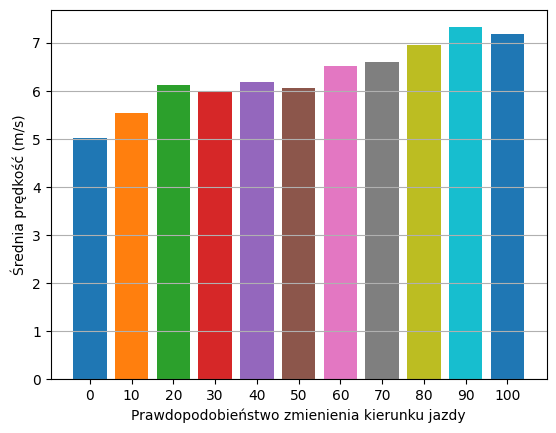

In [25]:
for i, frame in enumerate(probabilities_csv):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label = f"{i*10}"
    plt.bar(label, grouped['speed'].mean())
plt.grid(axis="y")
plt.xlabel("Prawdopodobieństwo zmienienia kierunku jazdy")
plt.ylabel("Średnia prędkość (m/s)")
# plt.show()
plt.savefig('probability.png', dpi=300)

In [26]:

rl_0 = pd.read_csv('data/50_50.csv')
rl_1 = pd.read_csv('1_17/candy_1AV_17HV_emission.csv')
rl_2 = pd.read_csv('2_16/candy_2AV_16HV_emission.csv')
rl_3 = pd.read_csv('3_15/candy_3AV_15HV_emission.csv')
rl_6 = pd.read_csv('6_12/candy_6AV_12HV_emission.csv')
rl_9 = pd.read_csv('9_9/candy_9AV_9HV_emission.csv')
rl_18 = pd.read_csv('0_18/candy_18AV_0HV_emission_1.csv')

data = [rl_0, rl_1, rl_2, rl_3, rl_6, rl_9, rl_18]

labels = {
    0: "0 CAV",
    1: "1 CAV",
    2: "2 CAVs",
    3: "3 CAVs",
    4: "6 CAVs",
    5: "9 CAVs",
    6: "18 CAVs",
}

6.059389834713474
6.362674825517229
7.127686883017852
6.223729383243944
6.517232385333777
6.382747331002983
4.344036656714697


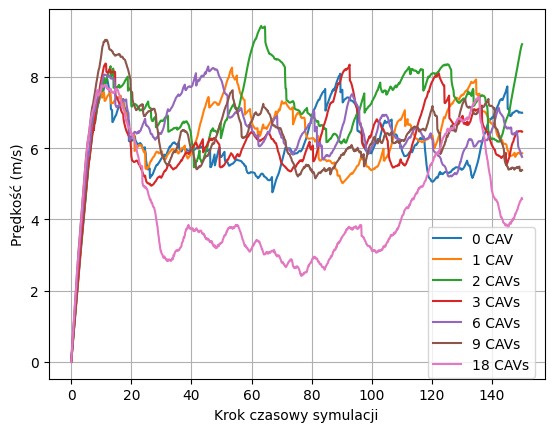

In [51]:
# data = [pd.read_csv(f'candy_9AV_9HV_emission.csv')]

for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=labels[i])
plt.legend(bbox_to_anchor=(0.75, 0.43))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
# plt.show()
plt.savefig('candy_speed.png', dpi=300)

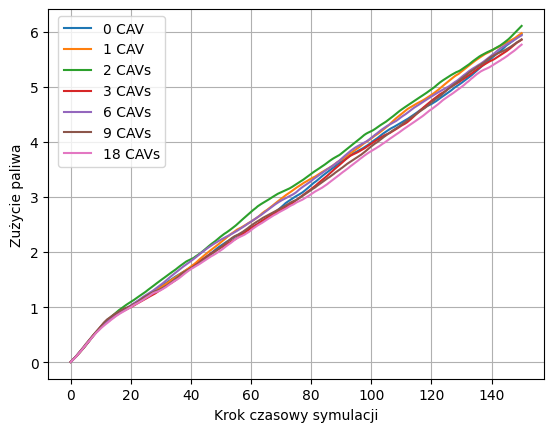

In [52]:
for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).sum().reset_index()
    grouped['fuel'] = grouped.fuel.cumsum()
    plt.plot(grouped['time'], grouped['fuel'], label=labels[i])
plt.legend(bbox_to_anchor=(0.25, 1))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Zużycie paliwa")
# plt.show()
plt.savefig('candy_fuel.png', dpi=300)

In [31]:
def cum_no_stopped_vehicles(csv):
    df = pd.DataFrame()
    pd.options.mode.chained_assignment = None
    for veh_id in csv["id"].unique():
        tmp = csv[csv['id'] == veh_id]
        a = tmp['speed'].to_numpy()
        a = [a[i] < 1.0 and a[i-1] > 1.0 for i in range(1, len(a))]
        a.append(False)
        tmp['speed'] = a
        df = pd.concat([df, tmp])
    tmp = csv.assign(stopped=df['speed'].to_numpy())
    tmp['stopped'] = tmp['stopped'].astype('int')
    tmp = tmp.groupby(by=['time']).sum().reset_index()
    tmp['stopped'] = tmp['stopped'].cumsum()
    return tmp

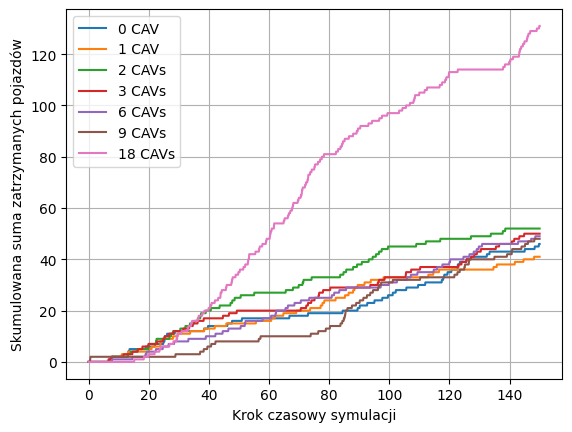

In [33]:
for i, frame in enumerate(data):
    plt.plot(cum_no_stopped_vehicles(frame)['time'], cum_no_stopped_vehicles(frame)['stopped'], label=labels[i])

plt.legend(loc='best')
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Skumulowana suma zatrzymanych pojazdów")
# plt.show()
plt.savefig('candy_cum_no_stopped_vehicles.png', dpi=300)

7.127686883017852


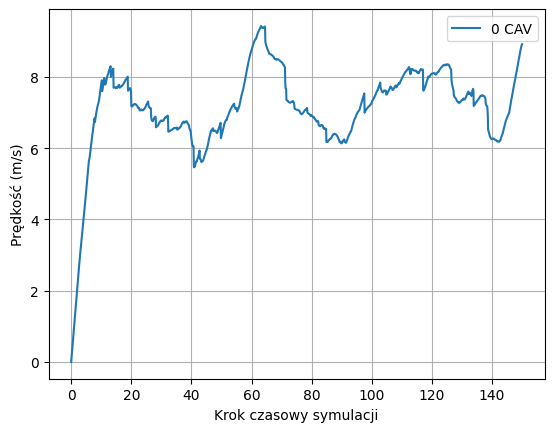

In [8]:
data = []
for i in range(1):
    data.append(pd.read_csv(f"2_16/candy_2AV_16HV_emission_{i+1}.csv"))

for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label =f"{i} CAV" if i != 2 else "14 CAV"
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
plt.show()

6.078767169469975
6.382747331002983


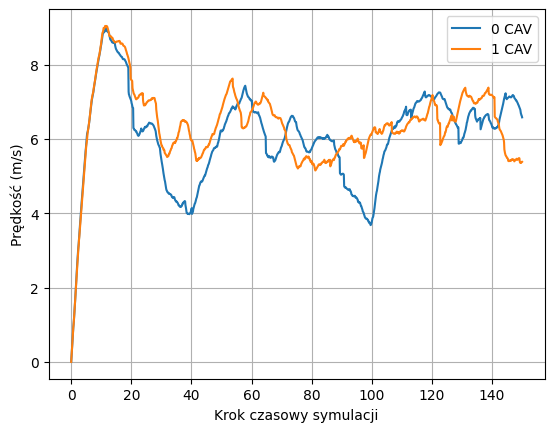

In [11]:
data = []
for i in range(2):
    data.append(pd.read_csv(f"9_9/candy_9AV_9HV_emission_{i+1}.csv"))

for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label =f"{i} CAV" if i != 2 else "14 CAV"
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
plt.show()

4.344036656714697
5.53505811032334
5.637036664561686
5.700608748580363


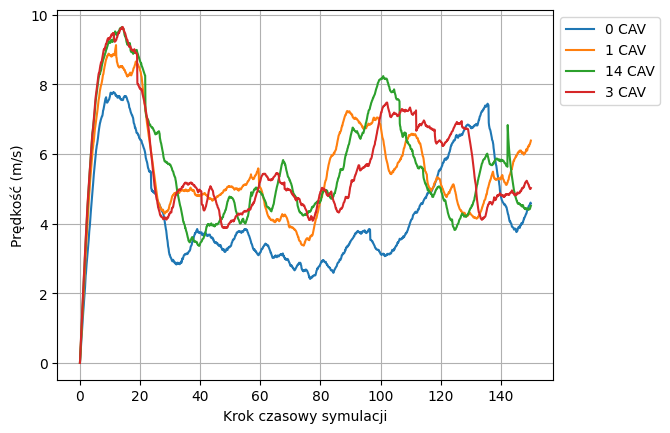

In [13]:
data = []
for i in range(4):
    data.append(pd.read_csv(f"18_0/candy_18AV_0HV_emission_{i+1}.csv"))

for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label =f"{i} CAV" if i != 2 else "14 CAV"
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
plt.show()

5.700608748580363
6.362674825517229
7.127686883017852
6.223729383243944
6.517232385333777
6.382747331002983


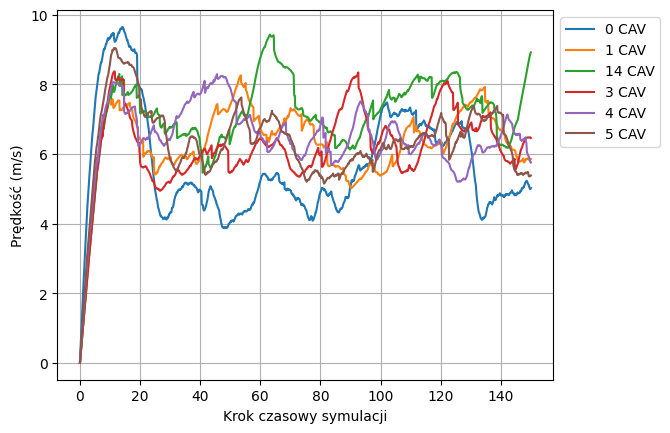

In [13]:
data = []
n_CAVs = [0, 1, 2, 3, 6, 9]
for i in n_CAVs:
    label = f"{i}_{18-i}"
    data.append(pd.read_csv(f"{label}/candy_{i}AV_{18-i}HV_emission.csv"))

for i, frame in enumerate(data):
    grouped = frame.groupby(by=['time']).mean().reset_index()
    label =f"{i} CAV" if i != 2 else "14 CAV"
    print(grouped['speed'].mean())
    plt.plot(grouped['time'], grouped['speed'], label=label)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.xlabel("Krok czasowy symulacji")
plt.ylabel("Prędkość (m/s)")
plt.show()